In [23]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from pathlib import Path
import umap
import pandas as pd

path = training_embeddings = Path(r'D:\Material_mask_autoencoder\output_dir\circle_valid\training_embeddings.npy')
path = training_labels = Path(r'D:\Material_mask_autoencoder\output_dir\circle_valid\training_labels.npy')
path = valid_embeddings = Path(r'D:\Material_mask_autoencoder\output_dir\circle_valid\valid_embeddings.npy')
path = valid_labels = Path(r'D:\Material_mask_autoencoder\output_dir\circle_valid\valid_labels.npy')

In [24]:
# Load the data
training_embeddings = np.load(Path(r'D:\Material_mask_autoencoder\output_dir\circle_valid\training_embeddings.npy'))
training_labels = np.load(Path(r'D:\Material_mask_autoencoder\output_dir\circle_valid\training_labels.npy'))
valid_embeddings = np.load(Path(r'D:\Material_mask_autoencoder\output_dir\circle_valid\valid_embeddings.npy'))
valid_labels = np.load(Path(r'D:\Material_mask_autoencoder\output_dir\circle_valid\valid_labels.npy'))


In [25]:
# Concatenate the training and validation embeddings and labels if necessary
embeddings = np.concatenate((training_embeddings, valid_embeddings), axis=0)
labels = np.concatenate((training_labels, valid_labels), axis=0)

# # Perform t-SNE on embeddings
# tsne = TSNE(n_components=2, random_state=42)
# tsne_results = tsne.fit_transform(embeddings)

# Perform UMAP on embeddings
umap_reducer = umap.UMAP(n_components=2)
umap_results = umap_reducer.fit_transform(embeddings)

In [26]:
training_csv_path = Path(r'D:\2d_composite_mesh_generator\circle\descriptors.csv')
valid_csv_path = Path(r'D:\2d_composite_mesh_generator\circle_valid\descriptors.csv')

In [27]:
# Read the CSV files
training_df = pd.read_csv(training_csv_path)
valid_df = pd.read_csv(valid_csv_path)

# Extract 'Vf_real' column for coloring
training_vf_real = training_df['Vf_real'].values
valid_vf_real = valid_df['Vf_real'].values

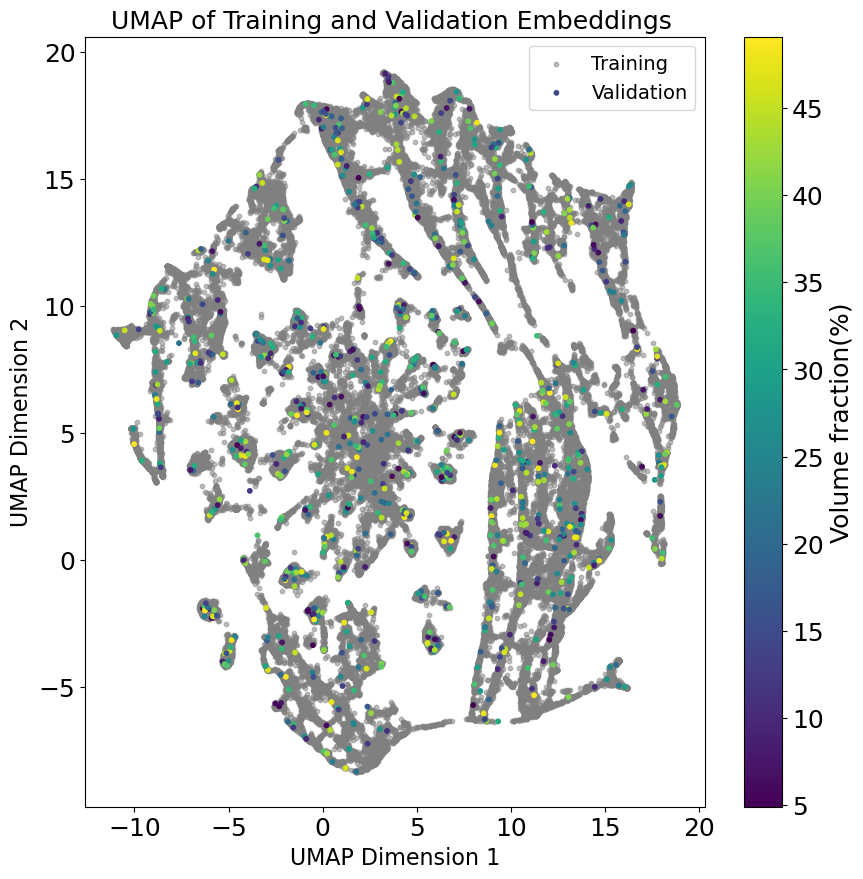

In [32]:
plt.figure(figsize=(10, 10))

# Plot training embeddings (colored in gray with transparency)
sc_train = plt.scatter(umap_results[:len(training_embeddings), 0], 
                       umap_results[:len(training_embeddings), 1], 
                       c='gray', alpha=0.5, s=10, label="Training")

# Plot validation embeddings (colored by valid_vf_real using viridis colormap)
sc_valid = plt.scatter(umap_results[len(training_embeddings):, 0], 
                       umap_results[len(training_embeddings):, 1], 
                       c=valid_vf_real[valid_labels], cmap='viridis', s=10, label="Validation")

# Add colorbar to represent 'Vf_real' for validation set, with larger font size
cbar = plt.colorbar(sc_valid, label='Volume fraction(%)')
cbar.ax.tick_params(labelsize=18)  # Increase colorbar tick size
cbar.set_label('Volume fraction(%)', fontsize=18)  # Increase colorbar label size

# Add legend with larger font size
plt.legend(fontsize=14)

# Set axis labels and title with larger font size
plt.title("UMAP of Training and Validation Embeddings ", fontsize=18)
plt.xlabel("UMAP Dimension 1", fontsize=16)
plt.ylabel("UMAP Dimension 2", fontsize=16)

# Set tick size on axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Show the plot
plt.show()


In [36]:
training_vf_real[training_labels].shape

(100000,)

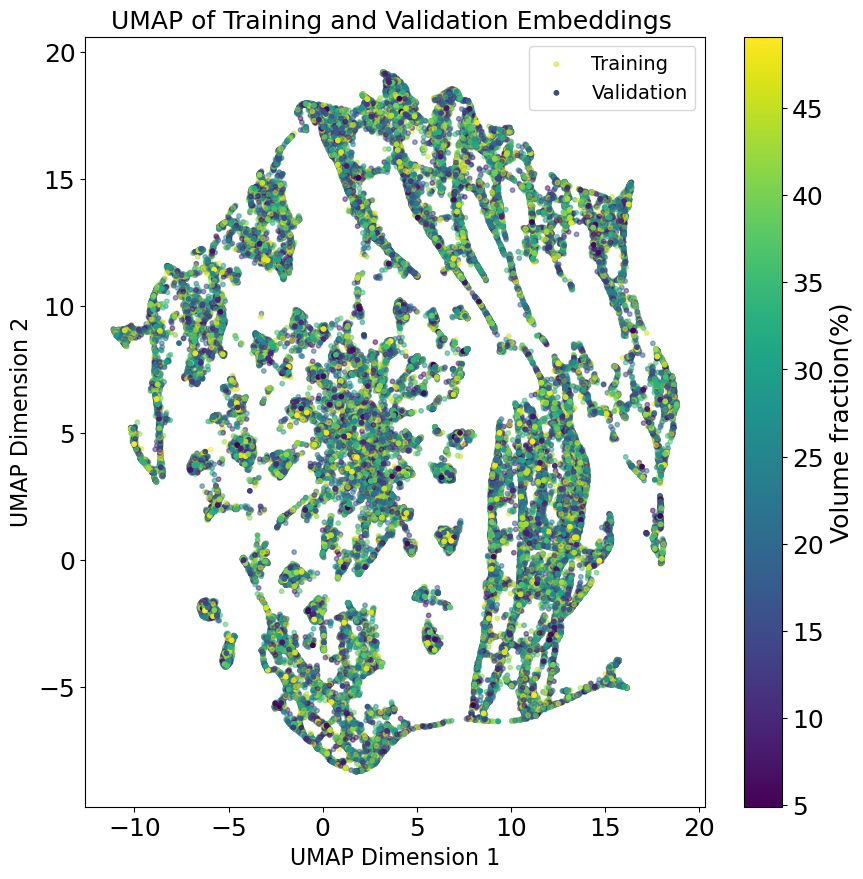

In [37]:
plt.figure(figsize=(10, 10))

# Plot training embeddings (colored in gray with transparency)
sc_train = plt.scatter(umap_results[:len(training_embeddings), 0], 
                       umap_results[:len(training_embeddings), 1], 
                       c=training_vf_real[training_labels], cmap='viridis', alpha=0.5, s=10, label="Training")

# Plot validation embeddings (colored by valid_vf_real using viridis colormap)
sc_valid = plt.scatter(umap_results[len(training_embeddings):, 0], 
                       umap_results[len(training_embeddings):, 1], 
                       c=valid_vf_real[valid_labels], cmap='viridis', s=10, label="Validation")

# Add colorbar to represent 'Vf_real' for validation set, with larger font size
cbar = plt.colorbar(sc_valid, label='Volume fraction(%)')
cbar.ax.tick_params(labelsize=18)  # Increase colorbar tick size
cbar.set_label('Volume fraction(%)', fontsize=18)  # Increase colorbar label size

# Add legend with larger font size
plt.legend(fontsize=14)

# Set axis labels and title with larger font size
plt.title("UMAP of Training and Validation Embeddings ", fontsize=18)
plt.xlabel("UMAP Dimension 1", fontsize=16)
plt.ylabel("UMAP Dimension 2", fontsize=16)

# Set tick size on axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Show the plot
plt.show()
